In [1]:
# import numpy for numerical and mathematical operations
import numpy as np

# import pandas for data processing and reading CSV files
import pandas as pd

# import matplotlib for basic data visualization (plots and charts)
import matplotlib.pyplot as plt

# import seaborn for advanced and attractive statistical visualizations
import seaborn as sns

In [2]:
# load the 'Social Network Ads' dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# display 5 random rows from the dataset
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
14,15628972,Male,18,82000,0
398,15755018,Male,36,33000,0
12,15746139,Male,20,86000,0
261,15680587,Male,36,144000,1
300,15736397,Female,58,38000,1


In [4]:
# select all rows and keep columns from index 2 onward
df = df.iloc[:, 2:]

In [5]:
# display 5 random rows from the dataframe
df.sample(5)

,Age,EstimatedSalary,Purchased
271,59,76000,1
83,35,88000,0
258,58,95000,1
237,37,80000,0
72,20,23000,0


## **Train Test Split**

In [6]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

# separate features and target, then divide them into 70% training and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

In [7]:
# check the number of rows and columns in training and testing feature sets
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [8]:
# import standardscaler to normalize feature values
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler on the training data to learn mean and standard deviation
scaler.fit(x_train)

# apply scaling to both training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
# view the mean value of each feature learned from the training data
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
# display the training feature dataset before scaling
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
# display the scaled training features as a numpy array
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
# convert the scaled numpy arrays back into pandas dataframes
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [13]:
# display the scaled training feature dataset
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
# display rounded summary statistics of the training data
np.round(x_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
# display rounded summary statistics of the scaled training data
# mean should be close to 0 and standard deviation close to 1
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


## **Effect of Scaling**

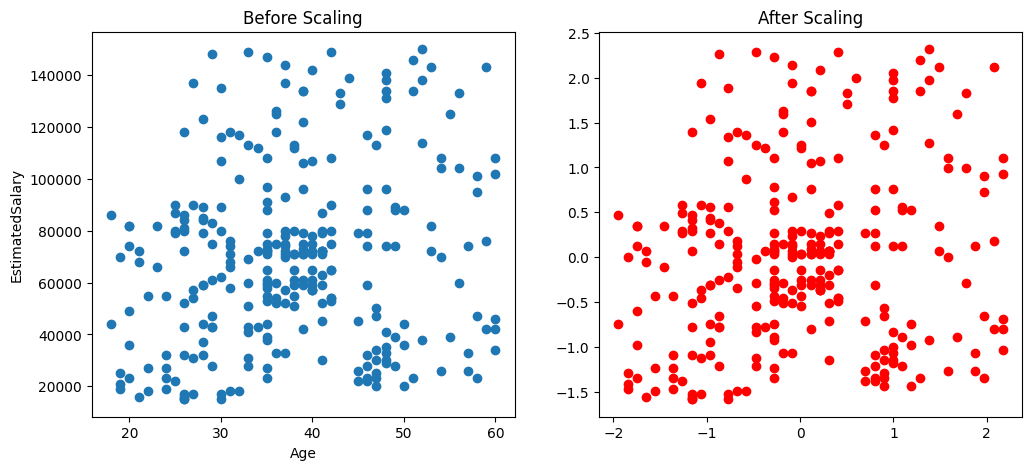

In [16]:
# create two side-by-side plots with a fixed figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# scatter plot of age vs estimated salary before scaling
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

# scatter plot of age vs estimated salary after scaling
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

# set x-axis and y-axis labels
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')

# display the plots
plt.show()

## **Plotting PDF**

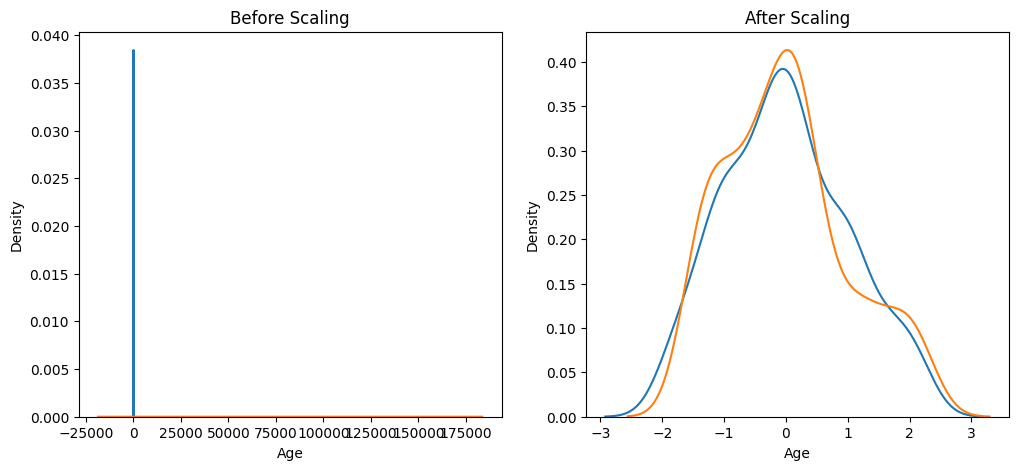

In [17]:
# create two side-by-side plots to compare feature distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# plot kernel density estimate (KDE) for features before scaling
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# plot kernel density estimate (KDE) for features after scaling
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

# display the plots
plt.show()

## **Comparision of Distributions -** Distributions remain the same, only the scale is dfferent

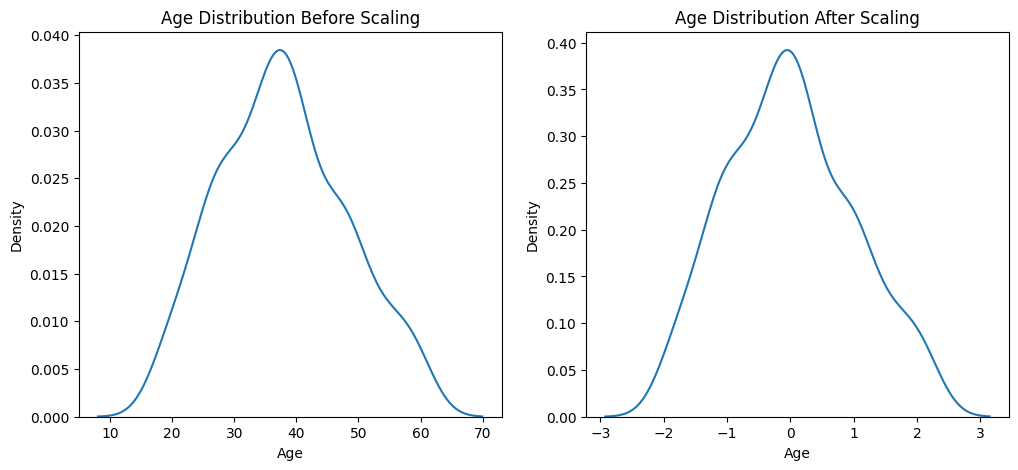

In [18]:
# create two side-by-side plots to compare age distribution before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# plot age distribution before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# plot age distribution after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

# display the plots
plt.show()

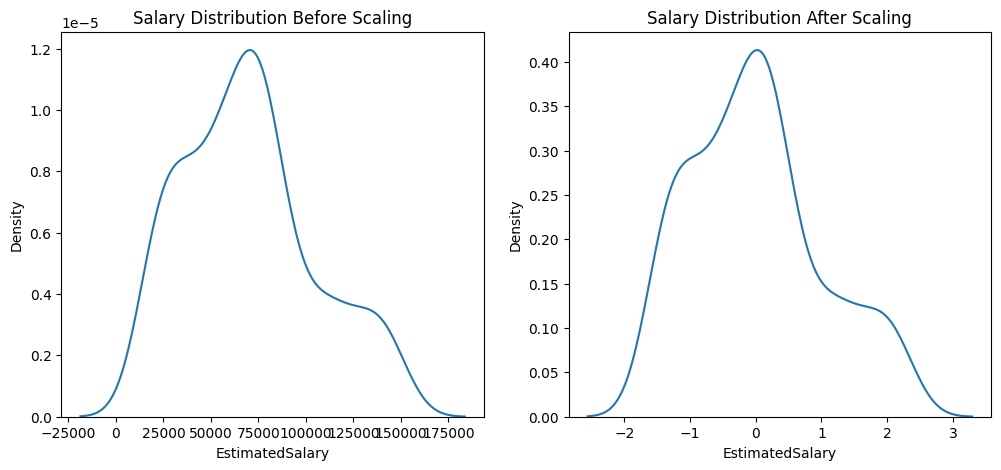

In [19]:
# create two side-by-side plots to compare salary distribution before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# plot salary distribution before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# plot salary distribution after standard scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

# display the plots
plt.show()

## **Why scaling is important ?**

In [20]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

In [21]:
# create a logistic regression model for original features
lr = LogisticRegression()

# create a separate logistic regression model for scaled features
lr_scaled = LogisticRegression()

In [22]:
# train the logistic regression model on original features
lr.fit(x_train, y_train)

# train the logistic regression model on scaled features
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [23]:
# make predictions on the test set using the logistic regression model trained on original features
y_pred = lr.predict(x_test)

# make predictions on the test set using the logistic regression model trained on scaled features
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [24]:
# import accuracy_score to evaluate model performance
from sklearn.metrics import accuracy_score

In [25]:
# calculate and print accuracy of the logistic regression models
# "Actual" → accuracy using original (unscaled) features
# "Scaled" → accuracy using standardized features
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

# note: the results may seem unusual because logistic regression often performs better with scaled features and the original features may have very different scales affecting convergence or predictions

Actual 0.875
Scaled 0.8666666666666667


In [26]:
# import decision tree classifier from scikit-learn
# note: decision trees are not affected by feature scaling
from sklearn.tree import DecisionTreeClassifier

In [27]:
# create a decision tree model for original features
dt = DecisionTreeClassifier()

# create a separate decision tree model for scaled features
dt_scaled = DecisionTreeClassifier()

In [28]:
# train the decision tree model on original features
dt.fit(x_train, y_train)

# train the decision tree model on scaled features
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [29]:
# make predictions on the test set using the decision tree model trained on original features
y_pred = dt.predict(x_test)

# make predictions on the test set using the decision tree model trained on scaled features
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [30]:
# calculate and print accuracy of the decision tree models
# "Actual" → accuracy using original (unscaled) features
# "Scaled" → accuracy using standardized features
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

# note: the accuracies should be the same or very similar
# because decision trees are not affected by feature scaling

Actual 0.875
Scaled 0.875


## **Effect of Outliers**

In [31]:
# display summary statistics of all numeric columns in the dataframe
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [32]:
# display the last 5 rows of the dataframe
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [33]:
# add some outlier rows to the dataset
df = pd.concat([df, pd.DataFrame(
    {
        'Age': [5, 90, 95],                 # very low and very high ages
        'EstimatedSalary': [1000, 250000, 350000],  # extremely low and high salaries
        'Purchased': [0, 1, 1]              # target values for the new rows
    })], ignore_index=True
)

In [34]:
# display the last 5 rows of the dataframe to verify added outliers
df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


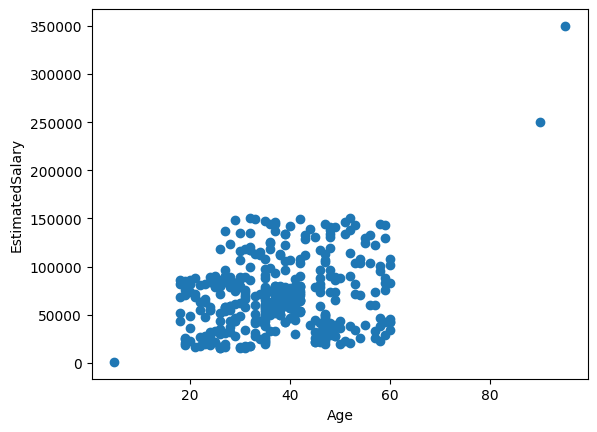

In [35]:
# create a scatter plot of age vs estimated salary
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [36]:
# split the updated dataset (with outliers) into training and testing sets
# 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),  # features (drop target column)
    df['Purchased'],               # target column
    test_size=0.3,                 # 30% data for testing
    random_state=0                 # fixed seed for reproducibility
)

In [37]:
# check the number of rows and columns in training and testing feature sets
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [38]:
# import standardscaler to normalize feature values
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler on the training data to learn mean and standard deviation
scaler.fit(x_train)

# apply scaling to both training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
# convert the scaled numpy arrays back into pandas dataframes
# this keeps the column names for easier reading and analysis
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

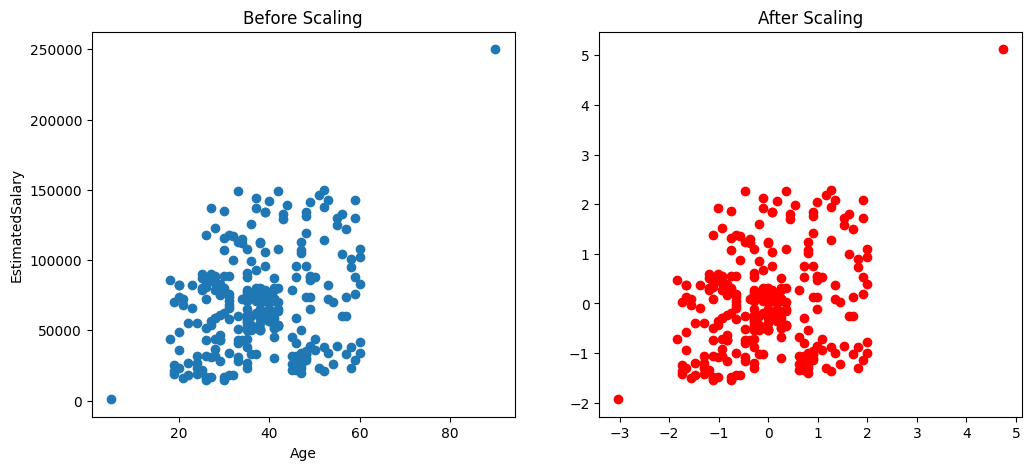

In [40]:
# create side-by-side scatter plots to compare features before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# scatter plot before scaling
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')

# scatter plot after scaling
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

# display the plots
plt.show()

In [41]:
# Outliers impact not get reduced (We have to handle it explicitly)